In [1]:
#@title The MIT License (MIT)
#
# Copyright (c) 2025 Eric dos Santos.
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.


# Handwritten Digit Prediction Model (MNIST)

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds

## MNIST Dataset

In [3]:
# Load the dataset
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Data preprocessing

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [5]:
# Add an extra dimension to the channel
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

## Model architecture

In [6]:
model = models.Sequential([

  # Input layer
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),

  # Dense layer
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.4),

  # Output Layer
  layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model compilation

In [7]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

## Model training

In [8]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 37ms/step - accuracy: 0.8117 - loss: 1.0598 - val_accuracy: 0.9738 - val_loss: 0.0885
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9653 - loss: 0.1234 - val_accuracy: 0.9724 - val_loss: 0.0948
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.9759 - loss: 0.0875 - val_accuracy: 0.9811 - val_loss: 0.0699
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9800 - loss: 0.0711 - val_accuracy: 0.9826 - val_loss: 0.0652
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9812 - loss: 0.0645 - val_accuracy: 0.9797 - val_loss: 0.0807
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9852 - loss: 0.0512 - val_accuracy: 0.9810 - val_loss: 0.0720
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.9867 - loss: 0.0499 - val_accuracy: 0.9842 - val_loss: 0.0808
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9880 -

### Model evaluation

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Accuracy on the test set: {100*test_acc:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9804 - loss: 0.1062
Accuracy on the test set: 98.42%


### Forecasts

In [ ]:
# Make predictions with the model
predictions = model.predict(x_test)

# Print the prediction for the first image
print(f'Prediction for the first image: {np.argmax(predictions[0])}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Prediction for the first image: 7


#### Other characters

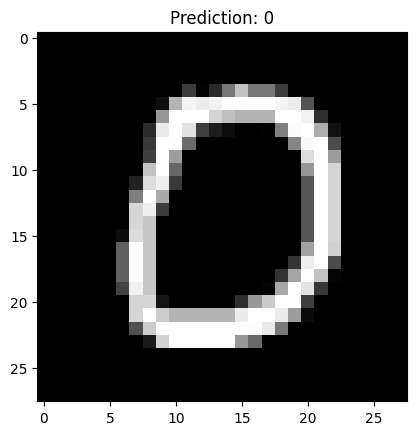

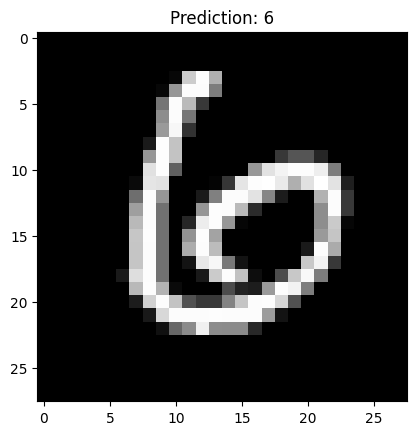

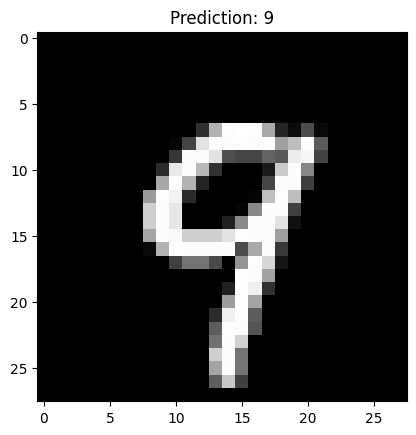

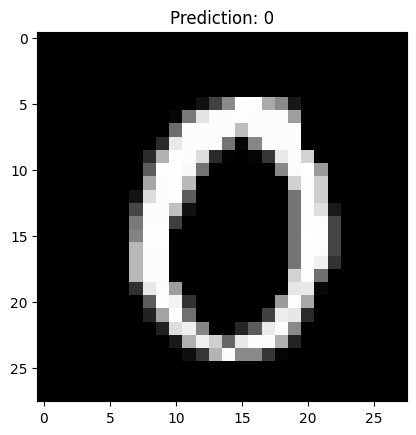

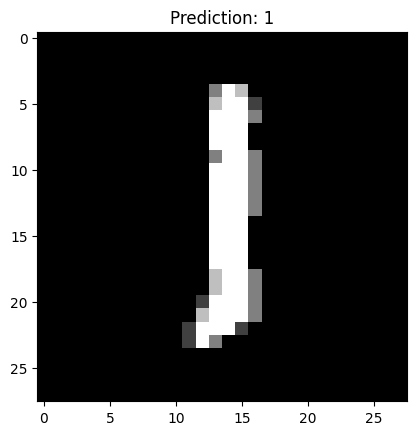

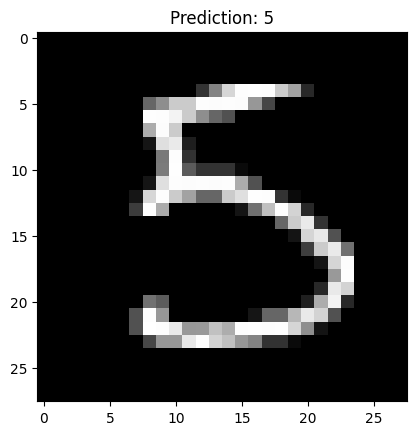

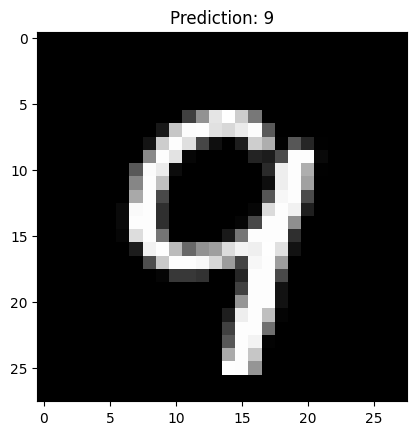

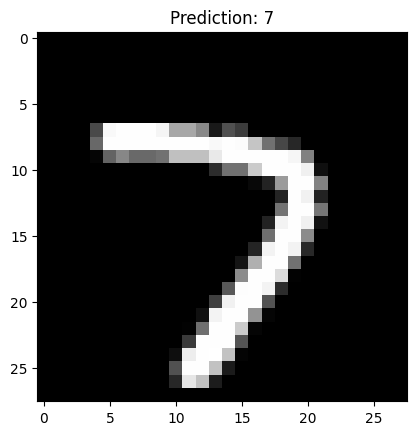

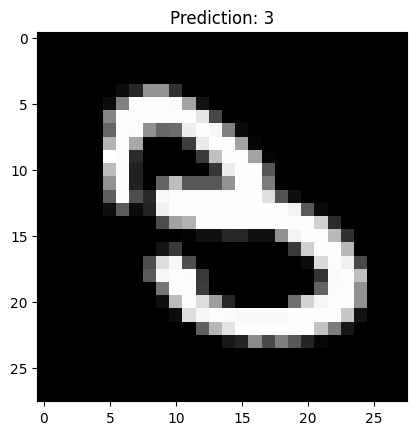

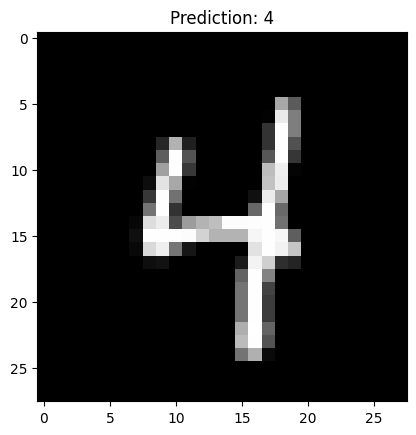

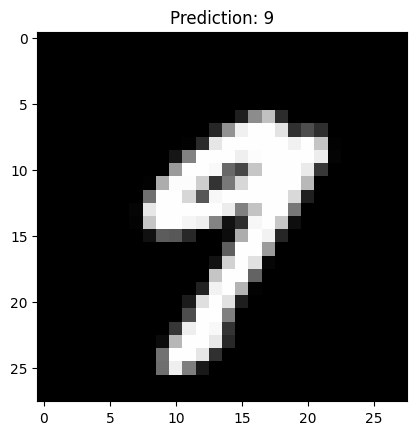

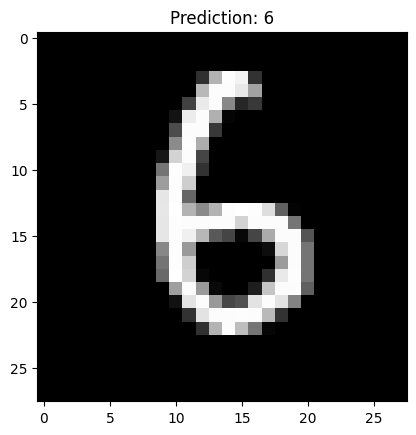

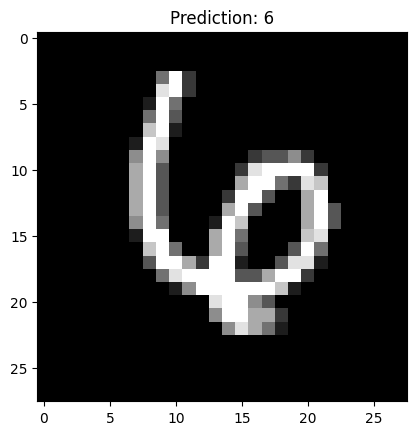

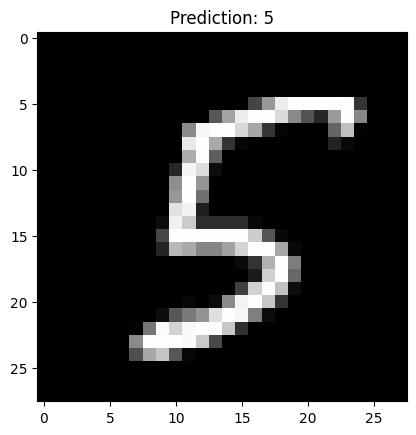

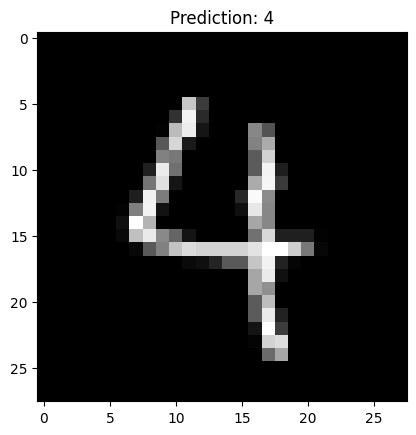

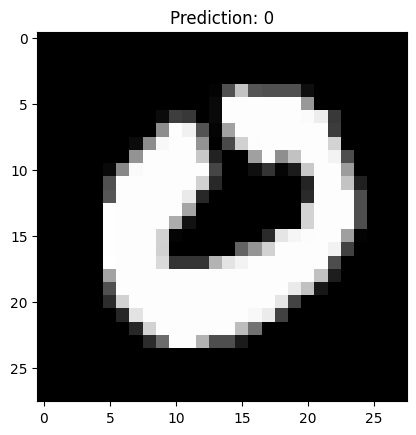

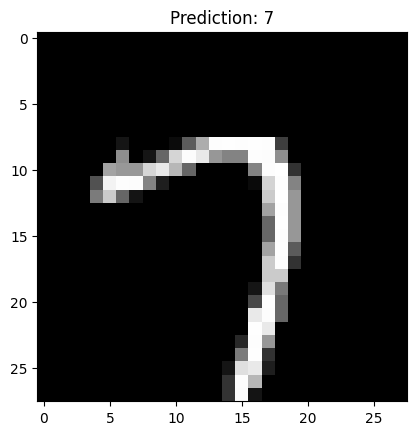

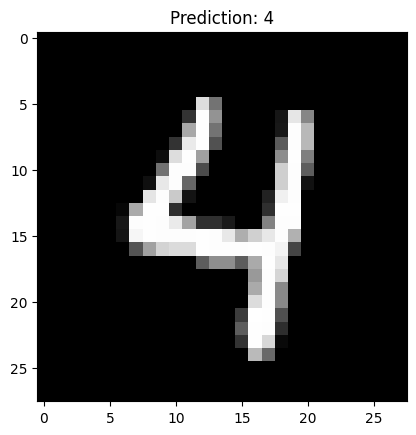

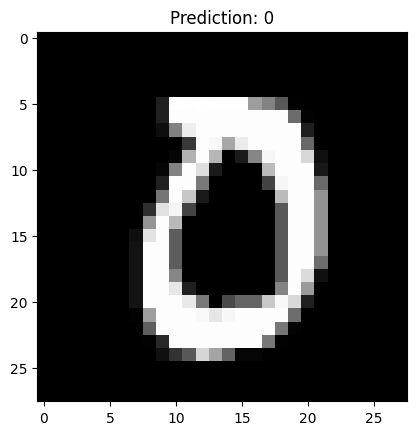

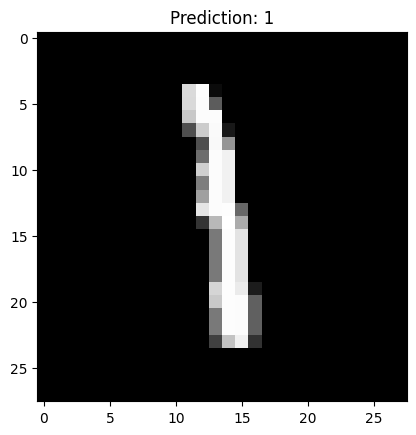

In [12]:
import matplotlib.pyplot as plt

# View some images and their predictions
for i in range(10, 30):
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title(f'Prediction: {np.argmax(predictions[i])}')
  plt.show()

## Save the model

In [13]:
model.save('MNIST_Predictor.keras')